In [1]:
import pandas as pd
import numpy as np
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import nltk
from nltk.tokenize import RegexpTokenizer


In [2]:
df_test = pd.read_csv('../datasets/test set/full_test_sep.tsv', sep='\t')
df_icf = pd.read_csv('../datasets/ICF/ICF_def_label.tsv', sep='\t')

In [3]:
icf_def = df_icf['def'][:-1].tolist() # exclude the none label def
labels = df_icf['label'].tolist()
sentence = df_test['utterances'].tolist()

# transform label to num
df_test.loc[df_test['gold'] == 'learning', 'gold'] = 0
df_test.loc[df_test['gold'] == 'general', 'gold'] = 1
df_test.loc[df_test['gold'] == 'communication', 'gold'] = 2
df_test.loc[df_test['gold'] == 'mobility', 'gold'] = 3
df_test.loc[df_test['gold'] == 'selfcare', 'gold'] = 4
df_test.loc[df_test['gold'] == 'domestic', 'gold'] = 5
df_test.loc[df_test['gold'] == 'interpersonal', 'gold'] = 6
df_test.loc[df_test['gold'] == 'major', 'gold'] = 7
df_test.loc[df_test['gold'] == 'social', 'gold'] = 8
df_test.loc[df_test['gold'] == 'none', 'gold'] = 9


checklabel = [0,1,2,3,4,5,6,7,8,9]
gold = df_test['gold'].tolist()
for n,i in enumerate(gold):
    if i not in checklabel:
        if i != '-'*20:
            print(i,n)
print('clean labels')

# gold


clean labels


In [4]:
if '-'*20 in sentence:
    print('with sep processing')
    sentence = [ i for i in sentence if i != '-'*20]

if '-'*20 in gold:
    print('with sep processing')
    gold = [ i for i in gold if i != '-'*20]

with sep processing
with sep processing


In [5]:
icf_def

['learning and applying knowledge is about learning, applying the knowledge that is learned, thinking, solving problems, and making decisions. ',
 'general tasks and demands is about general aspects of carrying out single or multiple tasks, organizing routines and handling stress. These items can be used in conjunction with more specific tasks or actions to identify the underlying features of the execution of tasks under different circumstances.',
 'communication is about general and specific features of communicating by language, signs and symbols, including receiving and producing messages, carrying on conversations, and using communication devices and techniques. ',
 'mobility is about moving by changing body position or location or by transferring from one place to another, by carrying, moving or manipulating objects, by walking, running or climbing, and by using various forms of transportation. ',
 "self-care is about caring for oneself, washing and drying oneself, caring for one'

In [6]:
print('num of def:', len(icf_def))
print('num of labels:', len(labels))
print('num of test sentences:',len(sentence))

num of def: 9
num of labels: 10
num of test sentences: 583


#### preprocess
- lower casing
- remove punctuation
- lemmatization
- remove stopwords
- tf-idf

In [7]:
with open ("../datasets/ICF/icf_level123_def.txt",'r',encoding='utf-8') as infile:
    raw_level123_def = infile.read()

In [8]:
level123_def = raw_level123_def.split('.')
print('num of train sentences:', len(level123_def))

num of train sentences: 320


In [9]:
def preprocess_text(list_of_sentence):
    """
    """
    tokenizer = RegexpTokenizer(r'\w+')
    lemmatizer = WordNetLemmatizer()
    stop_words = [w.lower() for w in stopwords.words('english')]
    processed = []
    for s in list_of_sentence:
        s = s.lower()
        clean_tokens = [lemmatizer.lemmatize(t) for t in word_tokenize(s) if t not in stop_words]
        s = ' '.join(clean_tokens)
        processed.append(s)

    return processed

In [10]:
# from sklearn.feature_extraction.text import TfidfVectorizer
model = TfidfVectorizer(lowercase=True)

#preprocess
train = preprocess_text(level123_def)
test = preprocess_text(sentence)
level_1 = preprocess_text(icf_def)

# Train the model
X_train = train
model.fit(X_train)
print('corpus vocab size:', len(model.vocabulary_.keys()))

# Generate Embeddings on Test
sentence1_emb = model.transform(test)
sentence2_emb = model.transform(level_1)

# Cosine Similarity
all_cos_score = cosine_similarity(sentence1_emb, sentence2_emb)
print('score dimension:', all_cos_score.shape)

# https://towardsdatascience.com/semantic-textual-similarity-83b3ca4a840e

corpus vocab size: 1531
score dimension: (583, 9)


In [11]:
# all_cos_score = all_cos_score.tolist()
max_cos = ["%.2f" % np.max(all_cos_score, axis = None)]
max_score_each_row = ["%.3f" % n for n in np.amax(all_cos_score, axis = 1)]
max_score_each_row = [float(n) for n in max_score_each_row]
max_score_ind = np.argmax(all_cos_score, axis =1)
print(len(max_score_each_row) == len(max_score_ind))
print('max cos:', max_cos)
print('max cos of each row:', 'total rows:', len(max_score_each_row))
print(max_score_each_row)
print('-'*20)
print('max cos index of each row:', 'total rows:', len(max_score_ind))
print(max_score_ind)
# max_score, max_score_ind

True
max cos: ['0.44']
max cos of each row: total rows: 583
[0.244, 0.0, 0.0, 0.209, 0.104, 0.174, 0.0, 0.104, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.102, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.144, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.112, 0.067, 0.0, 0.0, 0.0, 0.115, 0.0, 0.0, 0.244, 0.0, 0.282, 0.0, 0.0, 0.0, 0.0, 0.05, 0.0, 0.0, 0.0, 0.0, 0.0, 0.148, 0.0, 0.269, 0.191, 0.0, 0.068, 0.11, 0.099, 0.438, 0.0, 0.0, 0.108, 0.0, 0.0, 0.0, 0.106, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.275, 0.0, 0.0, 0.231, 0.0, 0.0, 0.0, 0.292, 0.0, 0.0, 0.231, 0.0, 0.0, 0.109, 0.0, 0.0, 0.0, 0.146, 0.153, 0.0, 0.0, 0.0, 0.141, 0.0, 0.0, 0.0, 0.07, 0.0, 0.0, 0.0, 0.104, 0.0, 0.0, 0.0, 0.112, 0.0, 0.0, 0.0, 0.0, 0.128, 0.0, 0.0, 0.0, 0.113, 0.0, 0.0, 0.122, 0.182, 0.0, 0.0, 0.0, 0.093, 0.231, 0.0, 0.0, 0.14, 0.173, 0.0, 0.0, 0.0, 0.162, 0.143, 0.0, 0.0, 0.237, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.103, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.114, 0.147, 0.0, 0.074, 0.109, 0.266, 0.0

In [12]:
m = max(max_score_ind)
m # the ind list only has 0-8 which are the real category, then we put 9 as index for 'none' in the following section

8

In [13]:
# add how to convert the possibility to label section
# get prediction
# from sklearn.metrics import f1_score

zip_scor_ind = list(zip(max_score_each_row, max_score_ind))

def get_predictions(zip_scor_ind, threshold):
    """"""
    # threshold = 0.10
    predictions = []
    for s, i in zip_scor_ind:
        if s >= threshold:
            predictions.append(i)
        elif s < threshold:
            predictions.append(9) # index 9 means 'none'
        else:
            print('error comparison')
    return predictions

def get_best_fscore(thresholdlist, zip_scor_ind, gold):
    """"""
    list_fscore = []
    for threshold in thresholdlist:
        predictions = get_predictions(zip_scor_ind, threshold)
        list_fscore.append(f1_score(gold, predictions,average='macro'))
    max_fsc = max(list_fscore)
    best_thres = thresholdlist[list_fscore.index(max(list_fscore))]
    return(max_fsc, best_thres)

# predictions = get_predictions(zip_scor_ind, threshold=0.1)
thresholdlist = [0.02, 0.1, 0.2, 0.3,0.4,0.5,0.6,0.7,0.8]
max_fsc, best_thres = get_best_fscore(thresholdlist, zip_scor_ind, gold)
print('threshold list:',thresholdlist)
print('max-macro fscore:', '%.3f' % max_fsc)
print('best threshold',best_thres)


threshold list: [0.02, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]
max-macro fscore: 0.288
best threshold 0.02


In [14]:
# get classification report 
predictions = get_predictions(zip_scor_ind, best_thres)
confusion = confusion_matrix(gold, predictions)
report = classification_report(gold, predictions)

print(report)

              precision    recall  f1-score   support

           0       0.25      0.07      0.11        27
           1       0.22      0.15      0.18        33
           2       0.36      0.28      0.31        18
           3       0.45      0.11      0.18        45
           4       0.38      0.26      0.31        31
           5       0.83      0.25      0.38        77
           6       0.59      0.25      0.35        67
           7       0.31      0.31      0.31        35
           8       0.55      0.11      0.18        57
           9       0.41      0.87      0.56       193

    accuracy                           0.42       583
   macro avg       0.43      0.27      0.29       583
weighted avg       0.48      0.42      0.37       583



In [15]:
for i, label in enumerate(labels):
    print(i,label)

0 learning 
1 general 
2 communication
3 mobility
4 selfcare 
5 domestic 
6 interpersonal 
7 major
8 social
9 none 


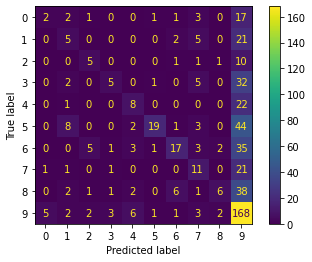

In [16]:
# plot confusion matrix 
disp = ConfusionMatrixDisplay(confusion_matrix=confusion,display_labels=checklabel)
disp.plot()
plt.show()

In [17]:
model = 'BOW'
df_predictions = pd.DataFrame({
    'utterances':sentence,
    'predictions':predictions
    })
df_predictions.to_csv(f'../datasets/predictions/predictions_{model}_level_1.tsv', sep='\t',index=None)